Imports

In [1]:
import numpy as np
import torch
import torch.nn as nn
from torch import optim
import torch.nn.functional as F
from torch.utils.data import DataLoader

from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

from utils import extract_time
from utils import random_generator
from utils import MinMaxScaler
from utils import sine_data_generation
from utils import visualization

from modules_and_training import TimeGAN
from modules_and_training import Time_GAN_module


Parameters

In [7]:
#output_size = 20
gamma = 1
no, seq_len, dim = 12800, 24, 5

parameters = dict()
parameters['module'] = 'gru' 
parameters['hidden_dim'] = 40
parameters['num_layers'] = 1
parameters['iterations'] = 100
parameters['batch_size'] = 128
parameters['epoch'] = 2

Data Generation:
12800 synthetic time univariate timeseries are created, with 24 timesteps each 

In [8]:
data = sine_data_generation(no, seq_len, dim)
data = MinMaxScaler(data)
data = torch.Tensor(data)
data.shape

torch.Size([12800, 24, 5])

Training and Examination of generating process: for each epoch a single sample is generated from the current state of the generator and visualized alongside with the coressponding loss values

Start Embedding Network Training
step: 1/2, e_loss: 1.0973067
Finish Embedding Network Training
Start Training with Supervised Loss Only
step: 1/2, s_loss: 0.10922559
Finish Training with Supervised Loss Only
Start Joint Training
step: 0/2, D_loss: 3.9269383, G_loss_U: 0.23352528, G_loss_S: 0.008146, E_loss_t0: 2.3708627


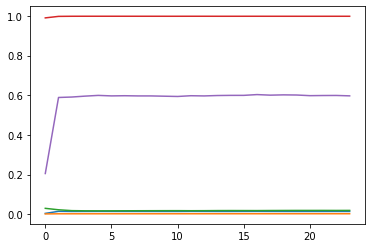

step: 0/2, D_loss: 3.350842, G_loss_U: 0.35520247, G_loss_S: 0.007924695, E_loss_t0: 2.3905292


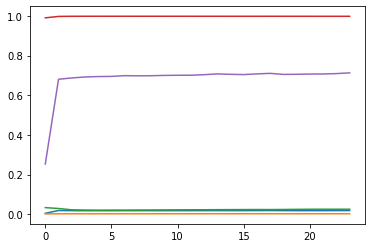

step: 0/2, D_loss: 2.7003284, G_loss_U: 0.5206837, G_loss_S: 0.007830366, E_loss_t0: 2.376655


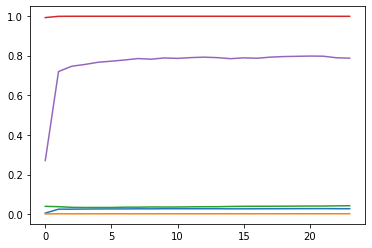

step: 0/2, D_loss: 2.264174, G_loss_U: 0.7029633, G_loss_S: 0.008100666, E_loss_t0: 2.323835


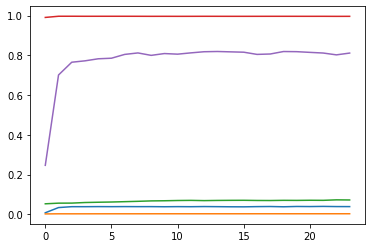

step: 0/2, D_loss: 2.0452685, G_loss_U: 0.8784673, G_loss_S: 0.008373353, E_loss_t0: 2.3621902


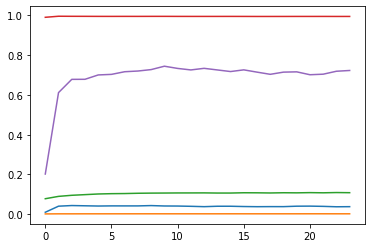

step: 0/2, D_loss: 1.9505028, G_loss_U: 1.0326916, G_loss_S: 0.00783099, E_loss_t0: 2.3247654


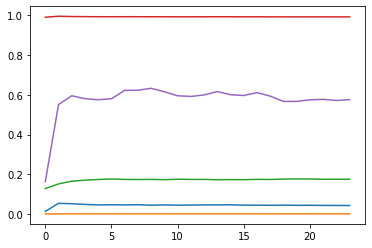

step: 0/2, D_loss: 1.9211878, G_loss_U: 1.1558216, G_loss_S: 0.007727122, E_loss_t0: 2.310696


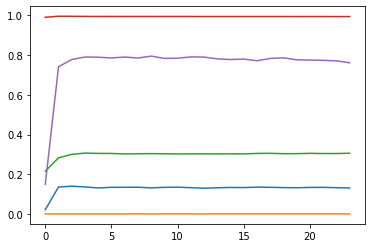

step: 0/2, D_loss: 1.9160571, G_loss_U: 1.2415991, G_loss_S: 0.007927186, E_loss_t0: 2.2146196


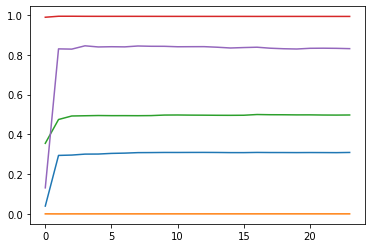

step: 0/2, D_loss: 1.916555, G_loss_U: 1.2882487, G_loss_S: 0.007988389, E_loss_t0: 2.1069524


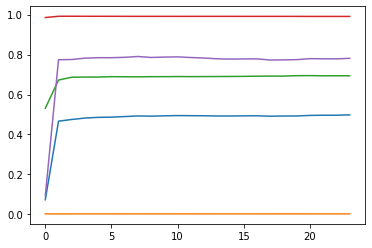

step: 0/2, D_loss: 1.9159697, G_loss_U: 1.298086, G_loss_S: 0.007985109, E_loss_t0: 2.0833757


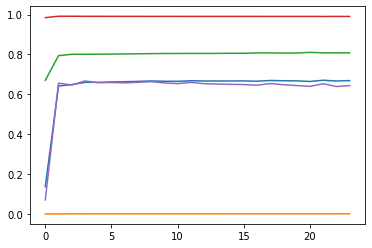

step: 0/2, D_loss: 1.9030871, G_loss_U: 1.2766138, G_loss_S: 0.008071731, E_loss_t0: 2.0517251


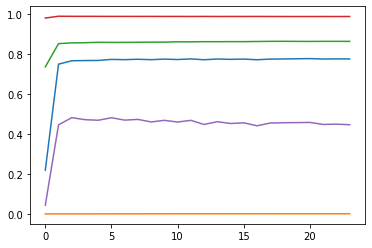

step: 0/2, D_loss: 1.8858757, G_loss_U: 1.2305312, G_loss_S: 0.00788098, E_loss_t0: 2.0961466


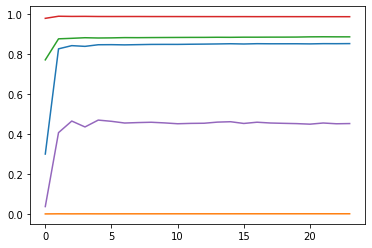

step: 0/2, D_loss: 1.8634274, G_loss_U: 1.1673071, G_loss_S: 0.008273261, E_loss_t0: 2.1321902


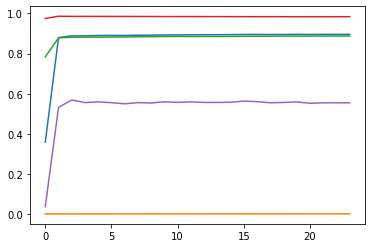

step: 0/2, D_loss: 1.8381277, G_loss_U: 1.0947304, G_loss_S: 0.008382649, E_loss_t0: 2.1590714


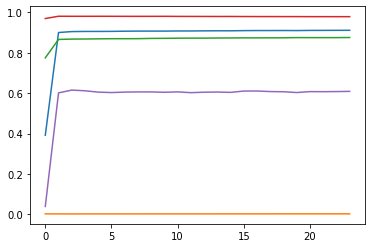

step: 0/2, D_loss: 1.8185458, G_loss_U: 1.0200032, G_loss_S: 0.008421601, E_loss_t0: 2.135688


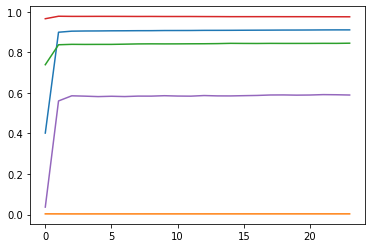

step: 0/2, D_loss: 1.8019261, G_loss_U: 0.9512984, G_loss_S: 0.008836437, E_loss_t0: 2.1543477


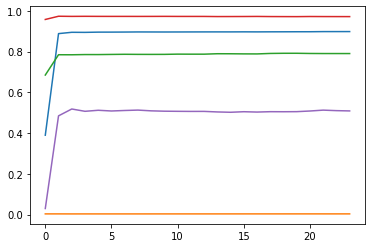

step: 0/2, D_loss: 1.7908349, G_loss_U: 0.89768547, G_loss_S: 0.00897806, E_loss_t0: 2.0727885


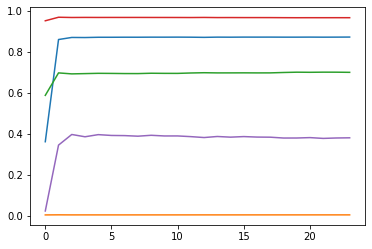

step: 0/2, D_loss: 1.7776102, G_loss_U: 0.8651269, G_loss_S: 0.009294342, E_loss_t0: 2.0702517


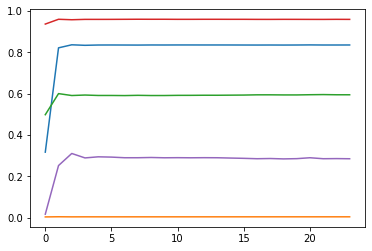

step: 0/2, D_loss: 1.7536405, G_loss_U: 0.8543184, G_loss_S: 0.009898061, E_loss_t0: 2.09815


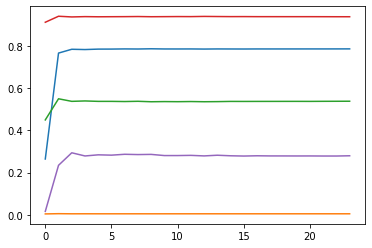

step: 0/2, D_loss: 1.7185678, G_loss_U: 0.86211896, G_loss_S: 0.010210324, E_loss_t0: 2.0640643


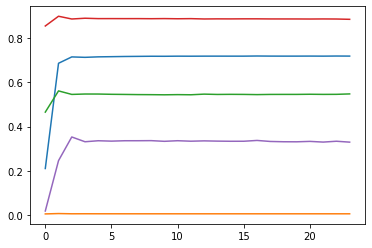

step: 0/2, D_loss: 1.6811359, G_loss_U: 0.8811939, G_loss_S: 0.010172859, E_loss_t0: 2.0557895


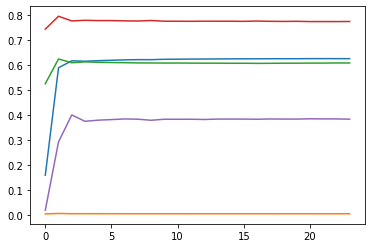

step: 0/2, D_loss: 1.6468287, G_loss_U: 0.89564866, G_loss_S: 0.01004835, E_loss_t0: 1.9756639


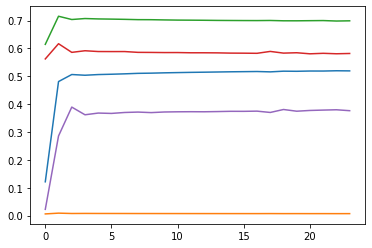

step: 0/2, D_loss: 1.6141248, G_loss_U: 0.88311523, G_loss_S: 0.009898913, E_loss_t0: 1.9178805


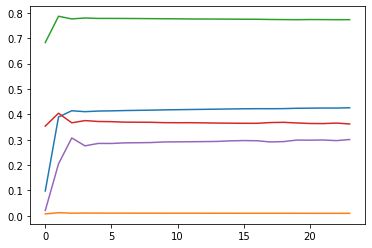

step: 0/2, D_loss: 1.5783802, G_loss_U: 0.8344243, G_loss_S: 0.010498076, E_loss_t0: 1.9643235


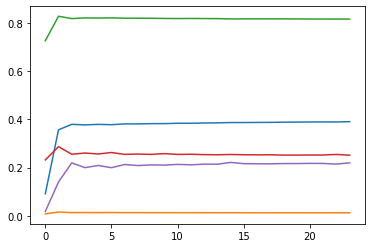

step: 0/2, D_loss: 1.5443475, G_loss_U: 0.7659641, G_loss_S: 0.010018978, E_loss_t0: 1.9410529


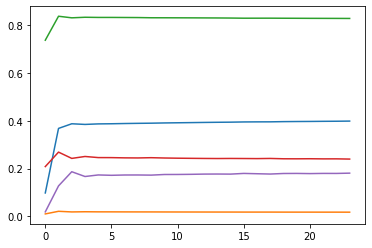

step: 0/2, D_loss: 1.5104182, G_loss_U: 0.72254896, G_loss_S: 0.010565636, E_loss_t0: 1.9440123


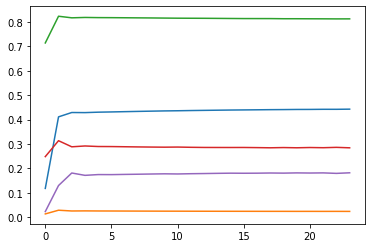

step: 0/2, D_loss: 1.482375, G_loss_U: 0.74004227, G_loss_S: 0.011570839, E_loss_t0: 1.9400438


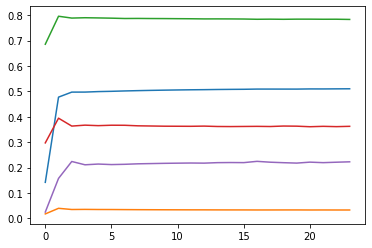

step: 0/2, D_loss: 1.4268961, G_loss_U: 0.90719336, G_loss_S: 0.011504656, E_loss_t0: 1.9044232


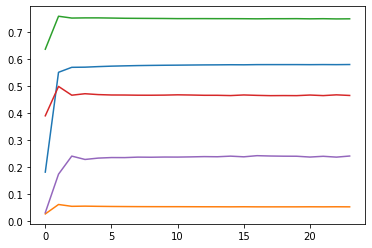

step: 0/2, D_loss: 1.3427849, G_loss_U: 1.3514217, G_loss_S: 0.01268636, E_loss_t0: 1.8841819


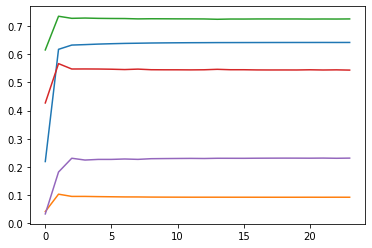

step: 0/2, D_loss: 1.3706158, G_loss_U: 0.9267562, G_loss_S: 0.012502862, E_loss_t0: 1.82435


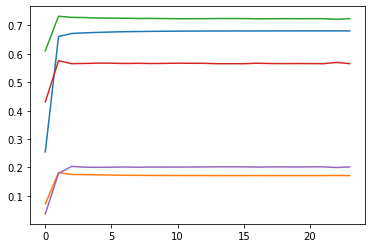

step: 0/2, D_loss: 1.18536, G_loss_U: 1.0101005, G_loss_S: 0.013786333, E_loss_t0: 1.8593767


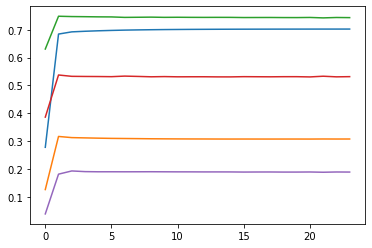

step: 0/2, D_loss: 1.0460978, G_loss_U: 1.811072, G_loss_S: 0.013958708, E_loss_t0: 1.7376041


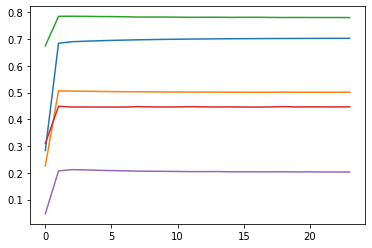

step: 0/2, D_loss: 1.155367, G_loss_U: 1.5850486, G_loss_S: 0.014306088, E_loss_t0: 1.5794084


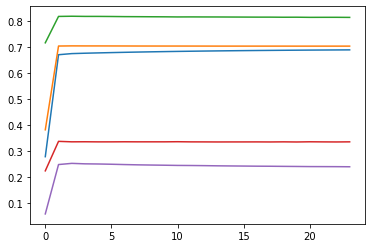

step: 0/2, D_loss: 0.70089936, G_loss_U: 0.5611739, G_loss_S: 0.015259033, E_loss_t0: 1.5826762


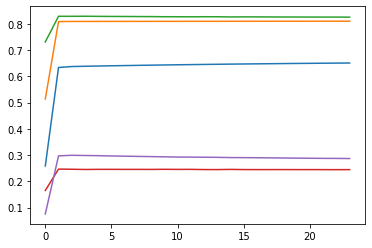

step: 0/2, D_loss: 1.2918538, G_loss_U: 1.9552122, G_loss_S: 0.017019112, E_loss_t0: 1.6231741


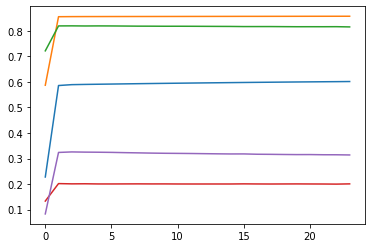

step: 0/2, D_loss: 0.47754008, G_loss_U: 2.34585, G_loss_S: 0.01893445, E_loss_t0: 1.616487


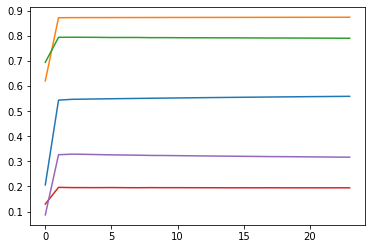

step: 0/2, D_loss: 0.6307102, G_loss_U: 2.5033886, G_loss_S: 0.020994168, E_loss_t0: 1.6229293


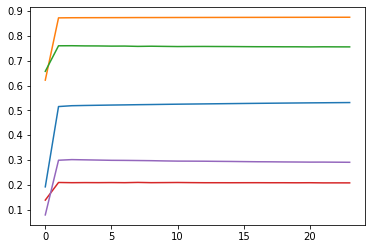

step: 0/2, D_loss: 0.51370734, G_loss_U: 2.548657, G_loss_S: 0.025075326, E_loss_t0: 1.6023147


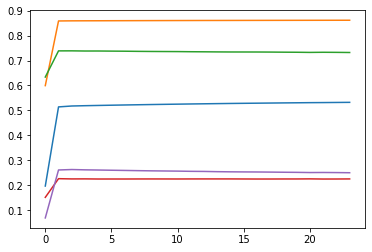

step: 0/2, D_loss: 0.3119105, G_loss_U: 2.5820239, G_loss_S: 0.030608753, E_loss_t0: 1.6577975


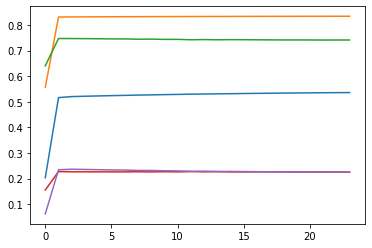

step: 0/2, D_loss: 0.24515767, G_loss_U: 2.6258514, G_loss_S: 0.037814405, E_loss_t0: 1.6109104


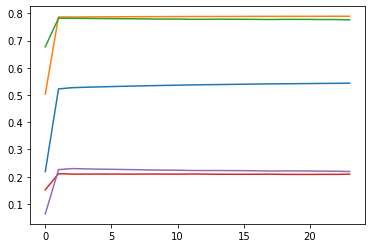

step: 0/2, D_loss: 0.20925125, G_loss_U: 2.6920261, G_loss_S: 0.04026604, E_loss_t0: 1.5628072


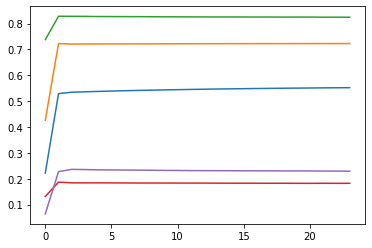

step: 0/2, D_loss: 0.18411642, G_loss_U: 2.783397, G_loss_S: 0.043421924, E_loss_t0: 1.528386


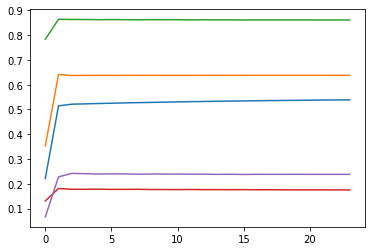

step: 0/2, D_loss: 0.16450295, G_loss_U: 2.8976033, G_loss_S: 0.04527475, E_loss_t0: 1.5290697


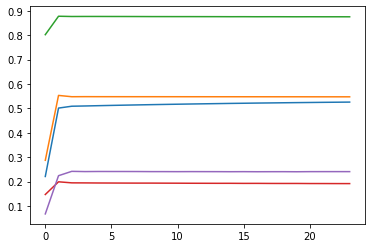

step: 0/2, D_loss: 0.14739697, G_loss_U: 2.8890564, G_loss_S: 0.0477207, E_loss_t0: 1.539623


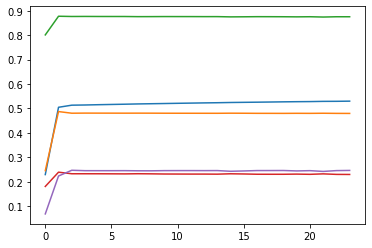

step: 0/2, D_loss: 0.14398131, G_loss_U: 2.8804042, G_loss_S: 0.052944023, E_loss_t0: 1.5252291


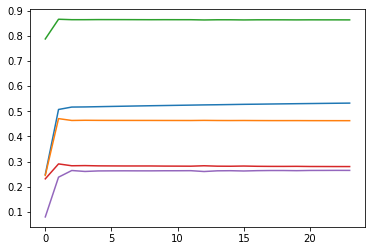

step: 0/2, D_loss: 0.14254123, G_loss_U: 2.8716545, G_loss_S: 0.058000058, E_loss_t0: 1.5424553


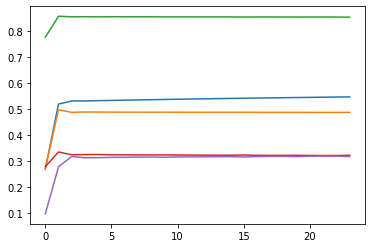

step: 0/2, D_loss: 0.14061724, G_loss_U: 2.8628435, G_loss_S: 0.061034825, E_loss_t0: 1.544507


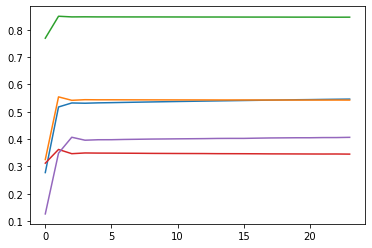

step: 0/2, D_loss: 0.14155108, G_loss_U: 2.8541458, G_loss_S: 0.060831085, E_loss_t0: 1.5563955


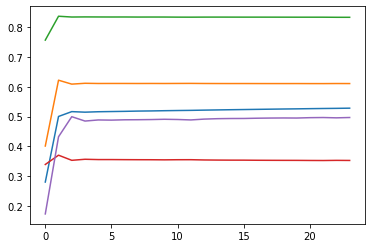

step: 0/2, D_loss: 0.1410727, G_loss_U: 2.8458946, G_loss_S: 0.06017611, E_loss_t0: 1.5037189


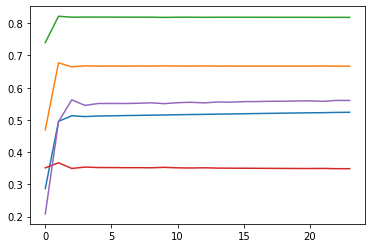

step: 0/2, D_loss: 0.14185403, G_loss_U: 2.8384917, G_loss_S: 0.059442304, E_loss_t0: 1.4969375


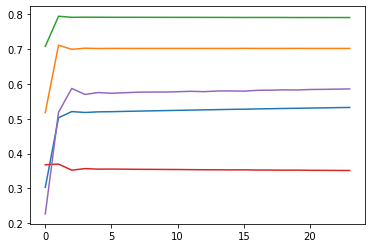

step: 0/2, D_loss: 0.14243843, G_loss_U: 2.8322544, G_loss_S: 0.059301686, E_loss_t0: 1.5519733


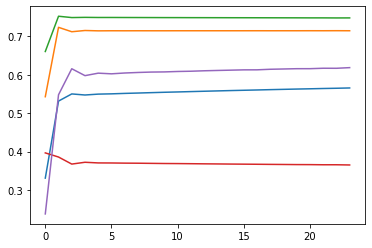

step: 0/2, D_loss: 0.14281176, G_loss_U: 2.8272724, G_loss_S: 0.060564358, E_loss_t0: 1.5329559


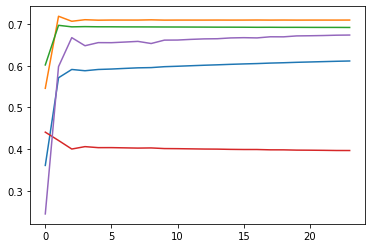

step: 0/2, D_loss: 0.14374554, G_loss_U: 2.8234222, G_loss_S: 0.060538117, E_loss_t0: 1.5070614


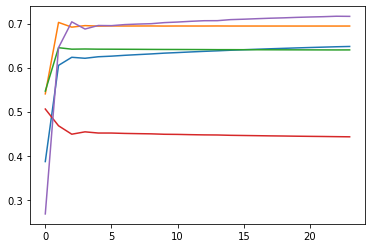

step: 0/2, D_loss: 0.14287941, G_loss_U: 2.820468, G_loss_S: 0.059199493, E_loss_t0: 1.4966158


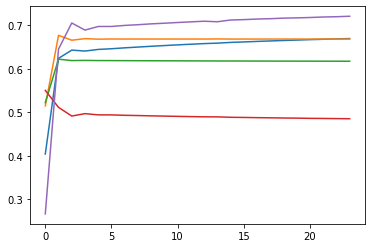

step: 0/2, D_loss: 0.14389607, G_loss_U: 2.8181627, G_loss_S: 0.057872597, E_loss_t0: 1.5238996


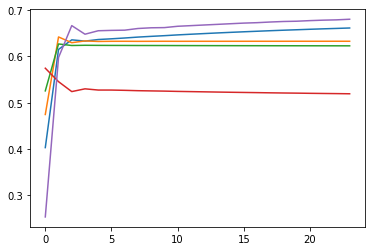

step: 0/2, D_loss: 0.14494026, G_loss_U: 2.8162816, G_loss_S: 0.056070462, E_loss_t0: 1.5292681


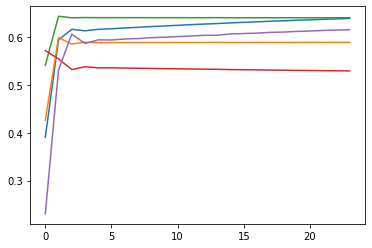

step: 0/2, D_loss: 0.14579557, G_loss_U: 2.8146582, G_loss_S: 0.05486042, E_loss_t0: 1.5186918


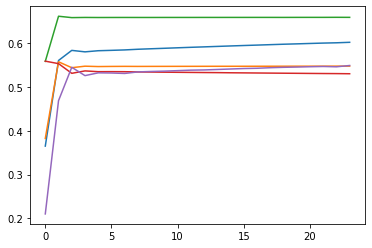

step: 0/2, D_loss: 0.14494768, G_loss_U: 2.8131573, G_loss_S: 0.055023443, E_loss_t0: 1.5044141


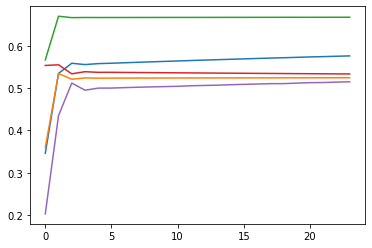

step: 0/2, D_loss: 0.1453684, G_loss_U: 2.811674, G_loss_S: 0.053740833, E_loss_t0: 1.5085863


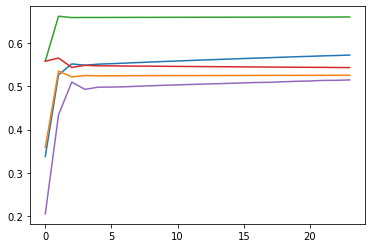

step: 0/2, D_loss: 0.14626846, G_loss_U: 2.810151, G_loss_S: 0.051872697, E_loss_t0: 1.5090241


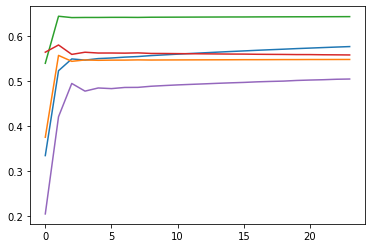

step: 0/2, D_loss: 0.14675462, G_loss_U: 2.8085968, G_loss_S: 0.052145213, E_loss_t0: 1.5102739


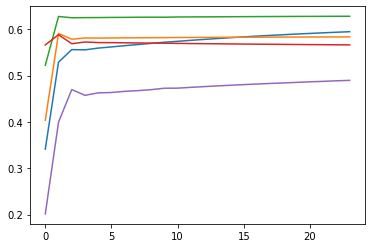

step: 0/2, D_loss: 0.1465191, G_loss_U: 2.8070326, G_loss_S: 0.05133485, E_loss_t0: 1.4596989


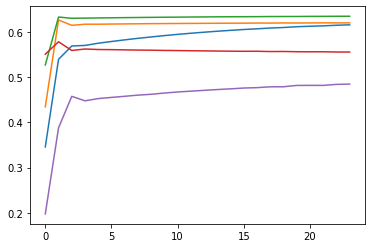

step: 0/2, D_loss: 0.14682204, G_loss_U: 2.8055127, G_loss_S: 0.050555658, E_loss_t0: 1.4772627


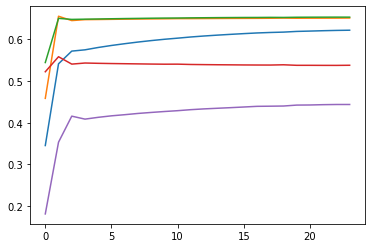

step: 0/2, D_loss: 0.14772916, G_loss_U: 2.8041058, G_loss_S: 0.049796145, E_loss_t0: 1.460798


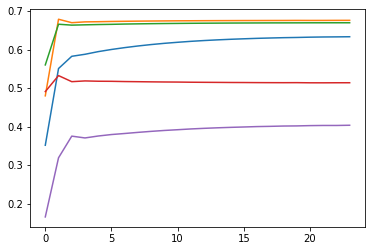

step: 0/2, D_loss: 0.1487711, G_loss_U: 2.802807, G_loss_S: 0.046198856, E_loss_t0: 1.494848


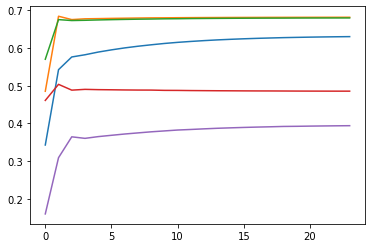

step: 0/2, D_loss: 0.14934957, G_loss_U: 2.801584, G_loss_S: 0.04689933, E_loss_t0: 1.4824324


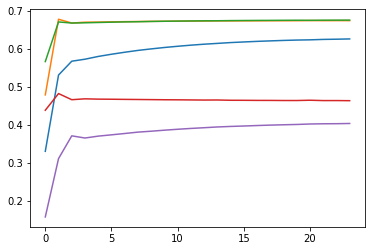

step: 0/2, D_loss: 0.14974023, G_loss_U: 2.8003922, G_loss_S: 0.046287294, E_loss_t0: 1.471406


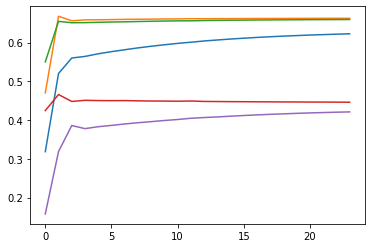

step: 0/2, D_loss: 0.15062876, G_loss_U: 2.9473276, G_loss_S: 0.044734772, E_loss_t0: 1.4535162


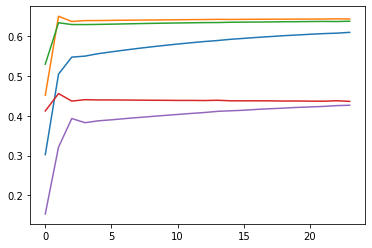

step: 0/2, D_loss: 0.13299336, G_loss_U: 2.9459295, G_loss_S: 0.045861658, E_loss_t0: 1.4645853


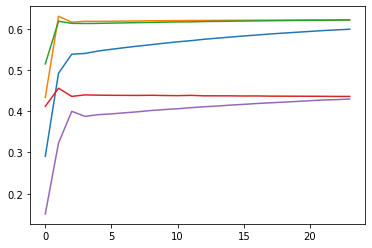

step: 0/2, D_loss: 0.13384981, G_loss_U: 2.9442031, G_loss_S: 0.044975847, E_loss_t0: 1.4549417


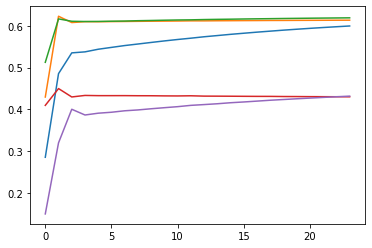

step: 0/2, D_loss: 0.13579555, G_loss_U: 2.9420235, G_loss_S: 0.043322816, E_loss_t0: 1.4562678


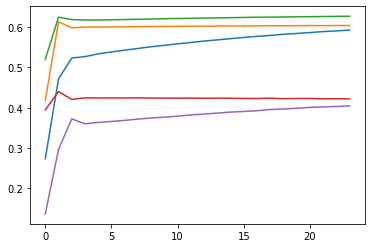

step: 0/2, D_loss: 0.13623697, G_loss_U: 2.9393272, G_loss_S: 0.04298053, E_loss_t0: 1.4450096


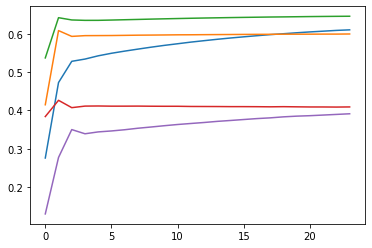

step: 0/2, D_loss: 0.13697569, G_loss_U: 2.9362094, G_loss_S: 0.042666227, E_loss_t0: 1.4384118


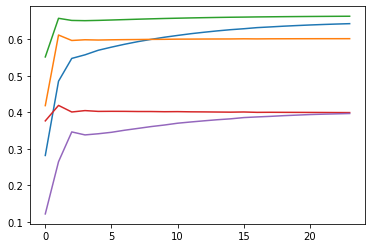

step: 0/2, D_loss: 0.13858566, G_loss_U: 2.9329593, G_loss_S: 0.041576773, E_loss_t0: 1.4485219


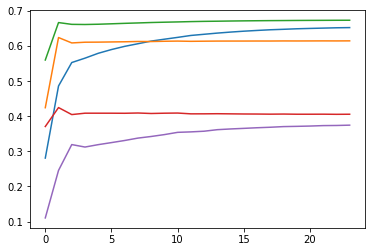

step: 0/2, D_loss: 0.13973583, G_loss_U: 2.9299352, G_loss_S: 0.040040288, E_loss_t0: 1.4331319


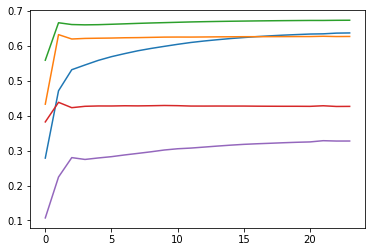

step: 0/2, D_loss: 0.14073478, G_loss_U: 2.9273527, G_loss_S: 0.03922585, E_loss_t0: 1.4218415


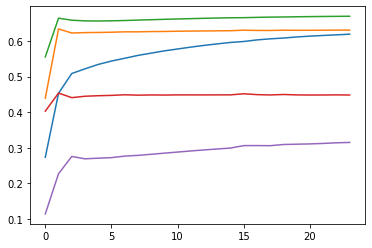

step: 0/2, D_loss: 0.13843001, G_loss_U: 2.9251804, G_loss_S: 0.04044139, E_loss_t0: 1.4364237


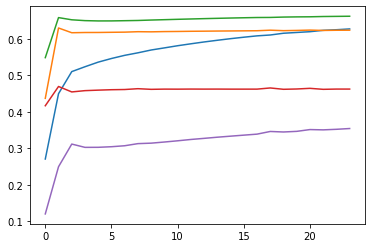

step: 0/2, D_loss: 0.14095826, G_loss_U: 2.9232464, G_loss_S: 0.038539886, E_loss_t0: 1.4506776


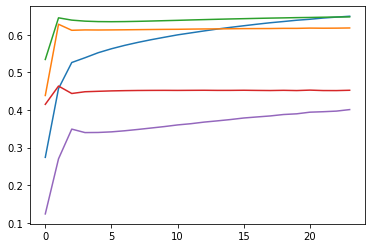

step: 0/2, D_loss: 0.14080775, G_loss_U: 2.921315, G_loss_S: 0.03910365, E_loss_t0: 1.4157737


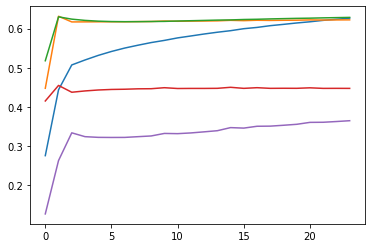

step: 0/2, D_loss: 0.14142849, G_loss_U: 2.919152, G_loss_S: 0.037656244, E_loss_t0: 1.4208207


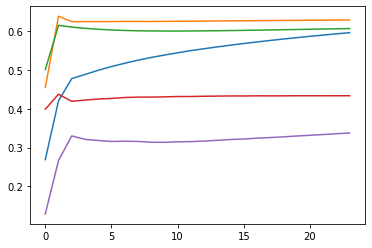

step: 0/2, D_loss: 0.1437716, G_loss_U: 2.9165323, G_loss_S: 0.03717267, E_loss_t0: 1.4036319


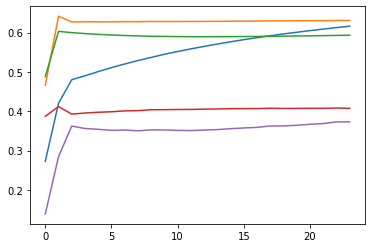

step: 0/2, D_loss: 0.14403021, G_loss_U: 2.9131804, G_loss_S: 0.036006793, E_loss_t0: 1.4298552


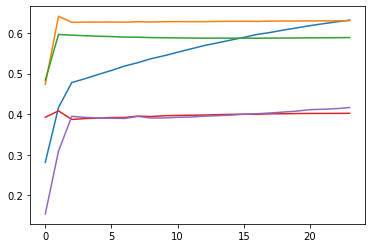

step: 0/2, D_loss: 0.14616857, G_loss_U: 2.9087284, G_loss_S: 0.035977274, E_loss_t0: 1.3793584


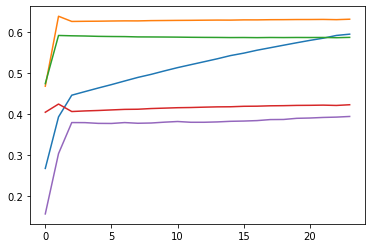

step: 0/2, D_loss: 0.14636484, G_loss_U: 2.9027874, G_loss_S: 0.03502373, E_loss_t0: 1.3868775


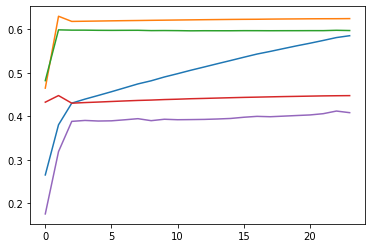

step: 0/2, D_loss: 0.147118, G_loss_U: 2.8952942, G_loss_S: 0.03531762, E_loss_t0: 1.4121281


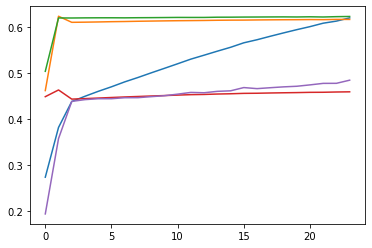

step: 0/2, D_loss: 0.14855592, G_loss_U: 2.886817, G_loss_S: 0.03552826, E_loss_t0: 1.3706073


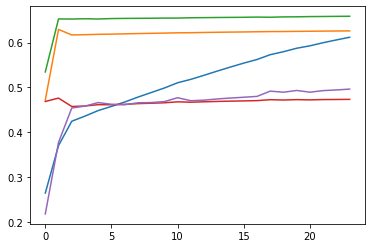

step: 0/2, D_loss: 0.15078768, G_loss_U: 3.0481853, G_loss_S: 0.034974955, E_loss_t0: 1.366616


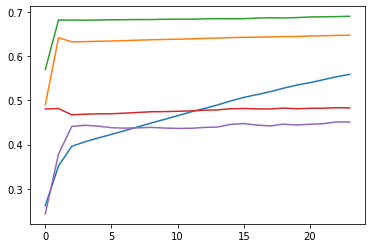

step: 0/2, D_loss: 0.1368869, G_loss_U: 3.0416753, G_loss_S: 0.034183975, E_loss_t0: 1.3902588


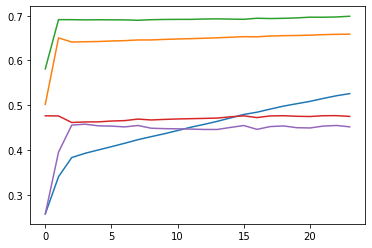

step: 0/2, D_loss: 0.13669312, G_loss_U: 3.0368643, G_loss_S: 0.033541486, E_loss_t0: 1.3715631


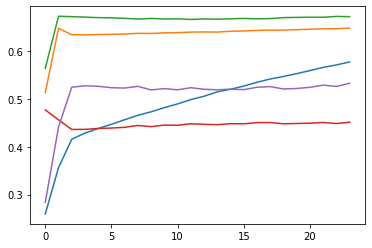

step: 0/2, D_loss: 0.13612826, G_loss_U: 3.0334976, G_loss_S: 0.03436619, E_loss_t0: 1.3241254


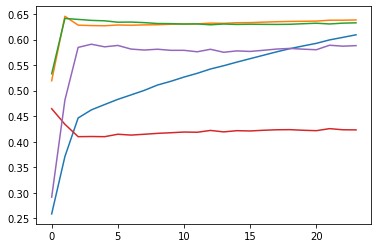

step: 0/2, D_loss: 0.13585095, G_loss_U: 3.031037, G_loss_S: 0.033664964, E_loss_t0: 1.3315312


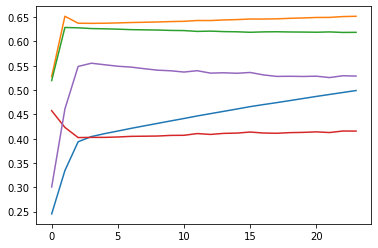

step: 0/2, D_loss: 0.13829838, G_loss_U: 3.0289834, G_loss_S: 0.033646148, E_loss_t0: 1.3148437


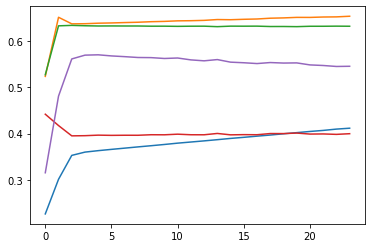

step: 0/2, D_loss: 0.13976747, G_loss_U: 3.0269058, G_loss_S: 0.03246931, E_loss_t0: 1.3489566


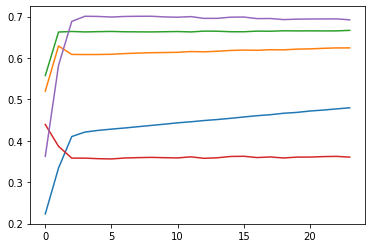

step: 0/2, D_loss: 0.13938591, G_loss_U: 3.024352, G_loss_S: 0.033669163, E_loss_t0: 1.320895


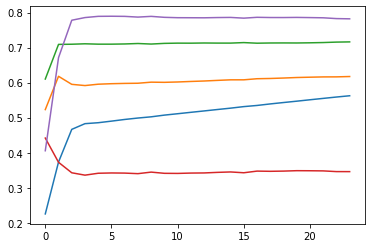

step: 0/2, D_loss: 0.14046024, G_loss_U: 3.020901, G_loss_S: 0.03277743, E_loss_t0: 1.3447794


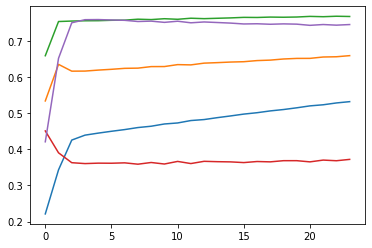

step: 0/2, D_loss: 0.1418851, G_loss_U: 3.0162935, G_loss_S: 0.03245177, E_loss_t0: 1.3072495


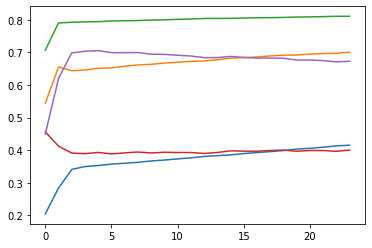

step: 0/2, D_loss: 0.14328142, G_loss_U: 3.0105565, G_loss_S: 0.03250097, E_loss_t0: 1.3197681


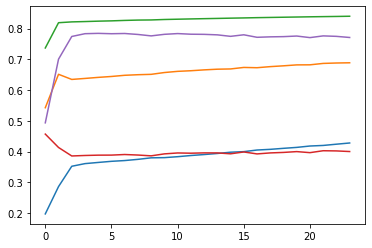

step: 0/2, D_loss: 0.1442848, G_loss_U: 3.004, G_loss_S: 0.032503642, E_loss_t0: 1.3157818


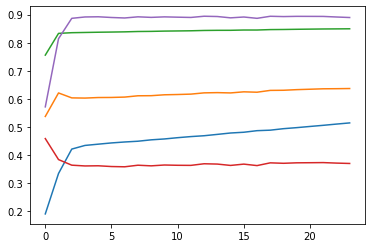

step: 0/2, D_loss: 0.1455511, G_loss_U: 2.996932, G_loss_S: 0.032431517, E_loss_t0: 1.3206029


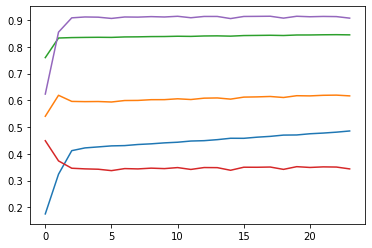

step: 0/2, D_loss: 0.14784965, G_loss_U: 2.9895735, G_loss_S: 0.03287785, E_loss_t0: 1.3280313


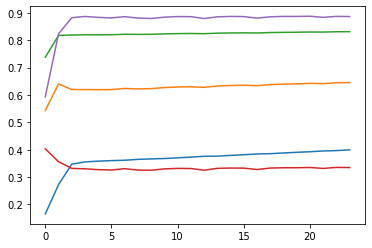

step: 1/2, D_loss: 3.2221048, G_loss_U: 0.08317488, G_loss_S: 0.030119972, E_loss_t0: 1.4058577


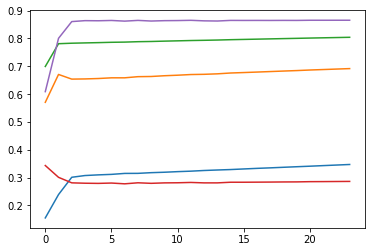

step: 1/2, D_loss: 3.3312643, G_loss_U: 0.08061067, G_loss_S: 0.030878501, E_loss_t0: 1.3300973


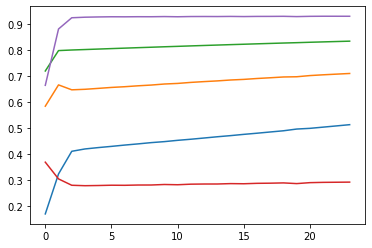

step: 1/2, D_loss: 3.170697, G_loss_U: 0.09585714, G_loss_S: 0.03129837, E_loss_t0: 1.2906344


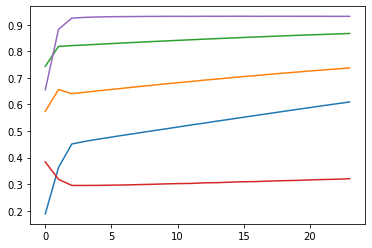

step: 1/2, D_loss: 2.8400655, G_loss_U: 0.13563085, G_loss_S: 0.03153251, E_loss_t0: 1.3450865


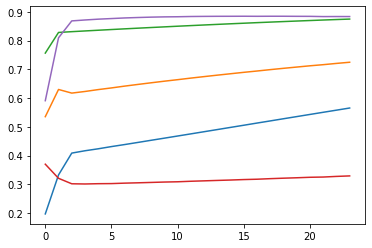

step: 1/2, D_loss: 2.4058864, G_loss_U: 0.2074482, G_loss_S: 0.031605586, E_loss_t0: 1.3082356


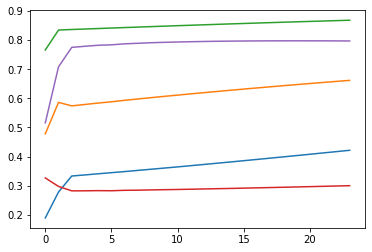

step: 1/2, D_loss: 1.9660157, G_loss_U: 0.31998798, G_loss_S: 0.031269826, E_loss_t0: 1.265157


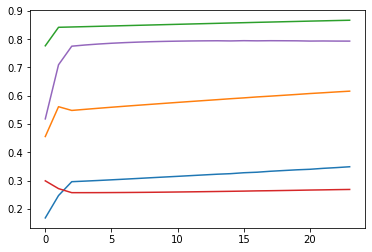

step: 1/2, D_loss: 1.5963624, G_loss_U: 0.48481417, G_loss_S: 0.031058224, E_loss_t0: 1.236956


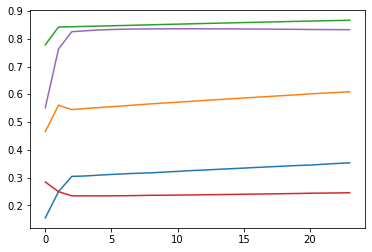

step: 1/2, D_loss: 1.315176, G_loss_U: 0.7082069, G_loss_S: 0.030715028, E_loss_t0: 1.2669407


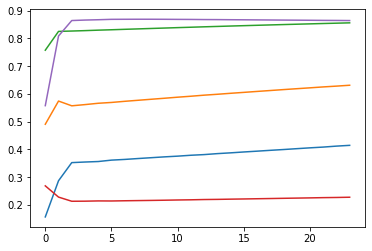

step: 1/2, D_loss: 1.133601, G_loss_U: 0.97136784, G_loss_S: 0.031112993, E_loss_t0: 1.2350672


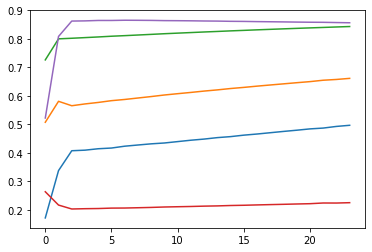

step: 1/2, D_loss: 1.0860913, G_loss_U: 1.227277, G_loss_S: 0.031212183, E_loss_t0: 1.1969216


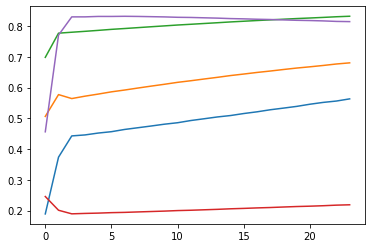

step: 1/2, D_loss: 1.1020613, G_loss_U: 1.440093, G_loss_S: 0.03195221, E_loss_t0: 1.2171506


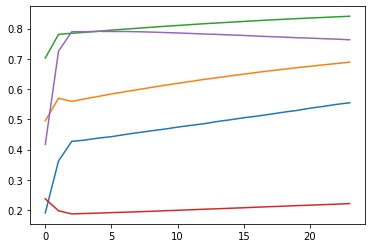

step: 1/2, D_loss: 1.1599107, G_loss_U: 1.594555, G_loss_S: 0.032323156, E_loss_t0: 1.2211728


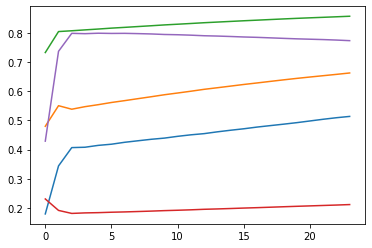

step: 1/2, D_loss: 1.2086989, G_loss_U: 1.6858495, G_loss_S: 0.033371072, E_loss_t0: 1.193116


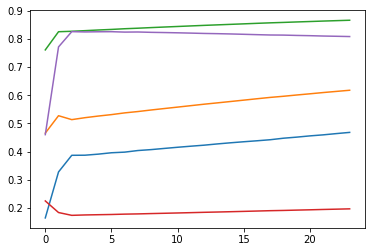

step: 1/2, D_loss: 1.2081943, G_loss_U: 1.7128124, G_loss_S: 0.035089444, E_loss_t0: 1.1806775


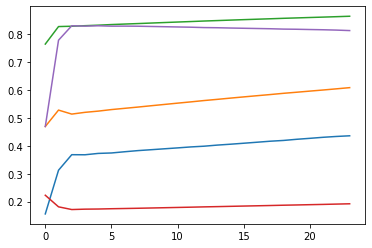

step: 1/2, D_loss: 1.1523273, G_loss_U: 1.6775953, G_loss_S: 0.036263186, E_loss_t0: 1.1678135


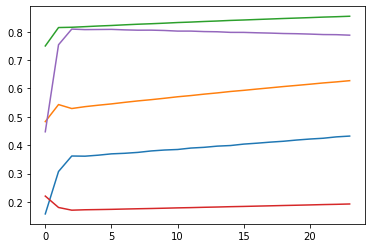

step: 1/2, D_loss: 1.0628394, G_loss_U: 1.5983299, G_loss_S: 0.03834702, E_loss_t0: 1.1737084


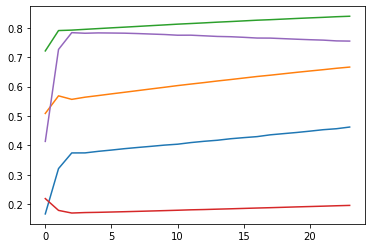

step: 1/2, D_loss: 0.9604078, G_loss_U: 1.513461, G_loss_S: 0.039992817, E_loss_t0: 1.1125674


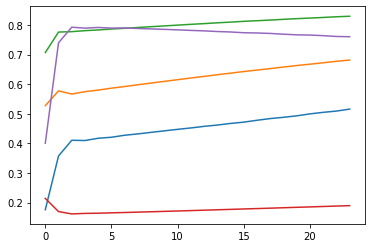

step: 1/2, D_loss: 0.88437307, G_loss_U: 1.4479772, G_loss_S: 0.04098675, E_loss_t0: 1.1396892


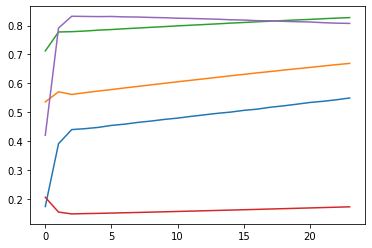

step: 1/2, D_loss: 0.80216587, G_loss_U: 1.4177936, G_loss_S: 0.04499828, E_loss_t0: 1.1247025


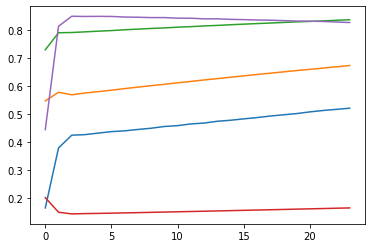

step: 1/2, D_loss: 0.72641206, G_loss_U: 1.4368798, G_loss_S: 0.047739517, E_loss_t0: 1.1070305


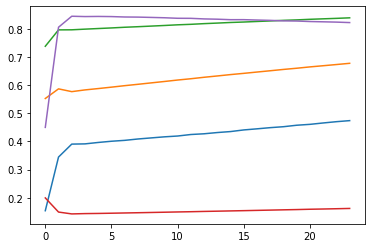

step: 1/2, D_loss: 0.66445076, G_loss_U: 1.5175653, G_loss_S: 0.049779445, E_loss_t0: 1.0964327


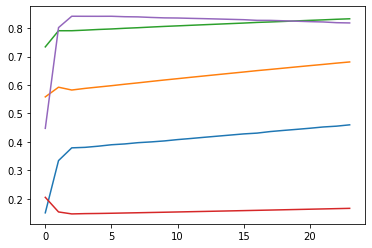

step: 1/2, D_loss: 0.58639216, G_loss_U: 1.6715456, G_loss_S: 0.052245937, E_loss_t0: 1.0546471


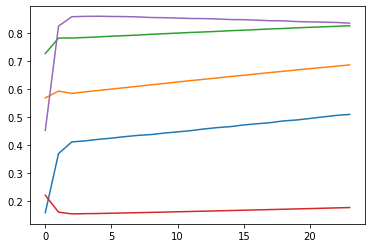

step: 1/2, D_loss: 0.5068559, G_loss_U: 1.8957038, G_loss_S: 0.054229494, E_loss_t0: 1.0505393


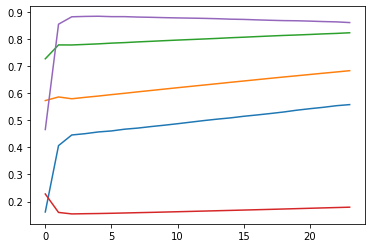

step: 1/2, D_loss: 0.42448586, G_loss_U: 2.1507213, G_loss_S: 0.05881035, E_loss_t0: 1.0400678


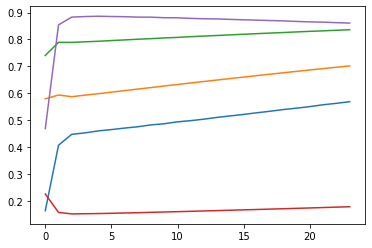

step: 1/2, D_loss: 0.36492082, G_loss_U: 2.3862083, G_loss_S: 0.057929195, E_loss_t0: 1.0513972


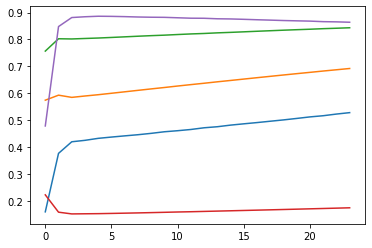

step: 1/2, D_loss: 0.31644678, G_loss_U: 2.5892918, G_loss_S: 0.06002626, E_loss_t0: 1.0293225


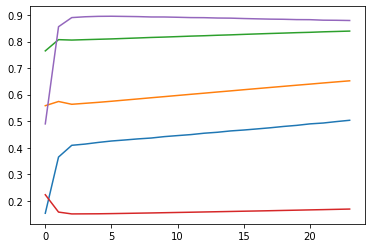

step: 1/2, D_loss: 0.2763214, G_loss_U: 2.7661378, G_loss_S: 0.0619192, E_loss_t0: 1.0504209


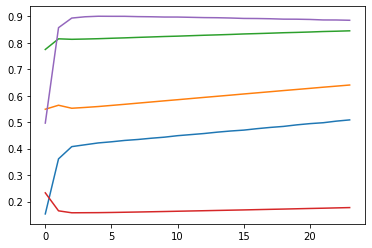

step: 1/2, D_loss: 0.24351427, G_loss_U: 2.923217, G_loss_S: 0.06359771, E_loss_t0: 1.0452653


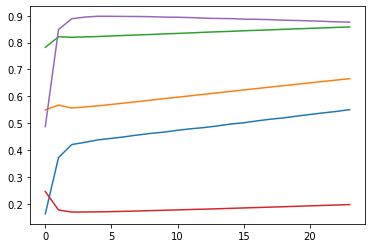

step: 1/2, D_loss: 0.21337537, G_loss_U: 3.0657194, G_loss_S: 0.06638713, E_loss_t0: 1.0185438


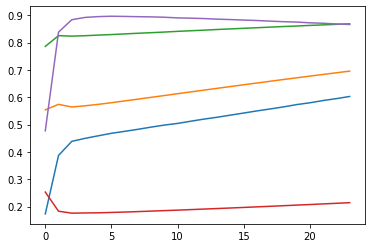

step: 1/2, D_loss: 0.19624189, G_loss_U: 3.1954157, G_loss_S: 0.06485474, E_loss_t0: 1.0697534


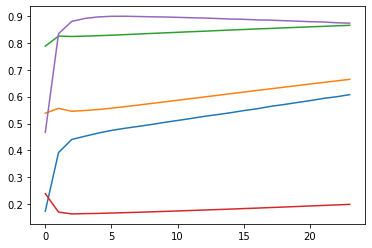

step: 1/2, D_loss: 0.18003666, G_loss_U: 3.3141935, G_loss_S: 0.06687978, E_loss_t0: 1.0585818


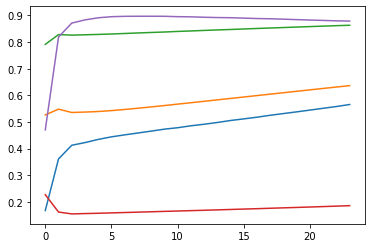

step: 1/2, D_loss: 0.15942863, G_loss_U: 3.424053, G_loss_S: 0.066571675, E_loss_t0: 1.0066748


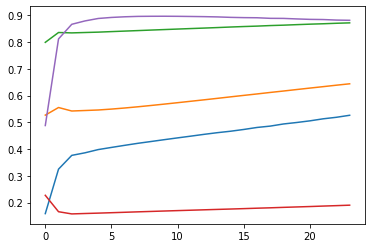

step: 1/2, D_loss: 0.14433645, G_loss_U: 3.4240482, G_loss_S: 0.06734021, E_loss_t0: 1.0103865


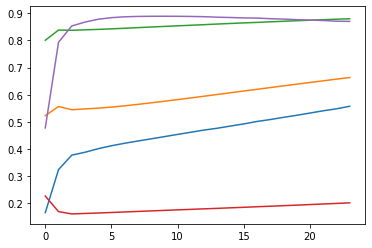

step: 1/2, D_loss: 0.14607853, G_loss_U: 3.4240437, G_loss_S: 0.06601276, E_loss_t0: 1.006651


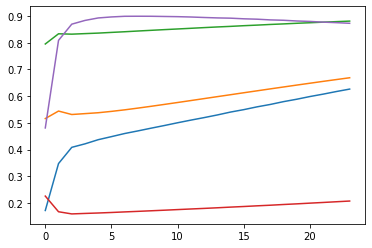

step: 1/2, D_loss: 0.14438409, G_loss_U: 3.424039, G_loss_S: 0.067295164, E_loss_t0: 1.0064454


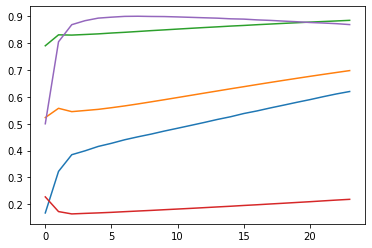

step: 1/2, D_loss: 0.14174306, G_loss_U: 3.4240344, G_loss_S: 0.067843445, E_loss_t0: 0.9799474


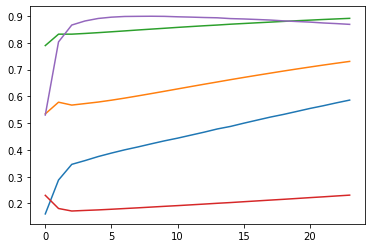

step: 1/2, D_loss: 0.14414182, G_loss_U: 3.4240296, G_loss_S: 0.066587135, E_loss_t0: 0.937944


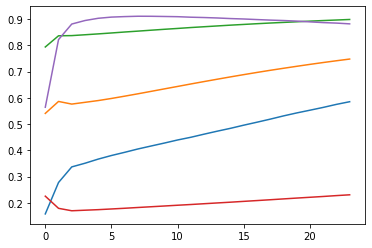

step: 1/2, D_loss: 0.1460031, G_loss_U: 3.4240248, G_loss_S: 0.0662684, E_loss_t0: 0.9337568


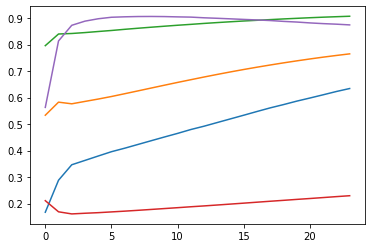

step: 1/2, D_loss: 0.14853582, G_loss_U: 3.42402, G_loss_S: 0.06531553, E_loss_t0: 0.96962696


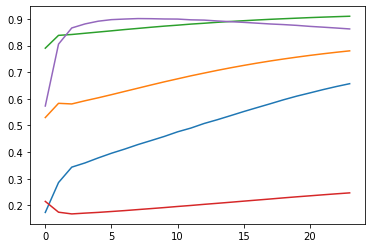

step: 1/2, D_loss: 0.14896199, G_loss_U: 3.4240158, G_loss_S: 0.06567504, E_loss_t0: 0.94719553


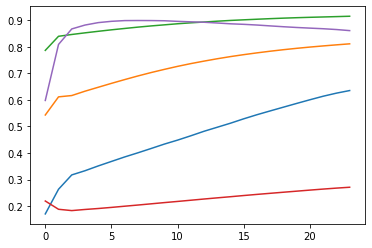

step: 1/2, D_loss: 0.1487282, G_loss_U: 3.4240112, G_loss_S: 0.06530361, E_loss_t0: 0.95071095


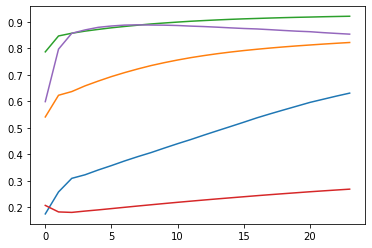

step: 1/2, D_loss: 0.15279248, G_loss_U: 3.523358, G_loss_S: 0.064487405, E_loss_t0: 0.94997036


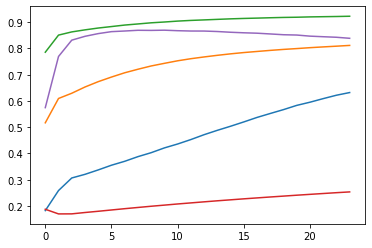

step: 1/2, D_loss: 0.14799707, G_loss_U: 3.5233543, G_loss_S: 0.06479324, E_loss_t0: 0.9461198


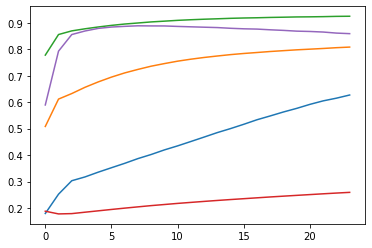

step: 1/2, D_loss: 0.14530006, G_loss_U: 3.52335, G_loss_S: 0.065852225, E_loss_t0: 0.95828897


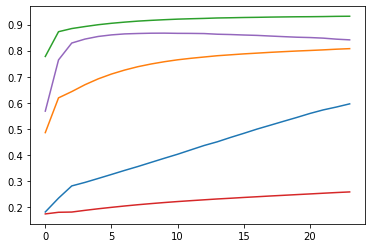

step: 1/2, D_loss: 0.14046414, G_loss_U: 3.5233462, G_loss_S: 0.06425994, E_loss_t0: 0.90216434


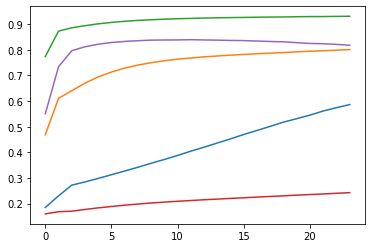

step: 1/2, D_loss: 0.14011599, G_loss_U: 3.523342, G_loss_S: 0.066010274, E_loss_t0: 0.93942696


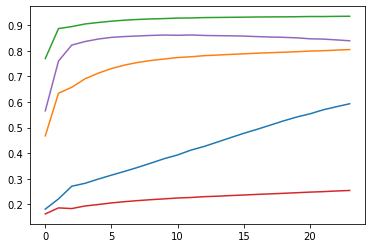

step: 1/2, D_loss: 0.13902307, G_loss_U: 3.5233374, G_loss_S: 0.06423357, E_loss_t0: 0.9130414


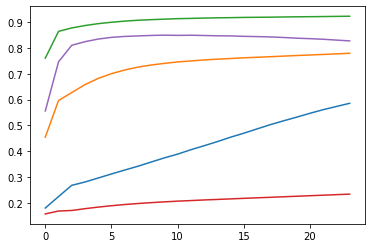

step: 1/2, D_loss: 0.15706919, G_loss_U: 3.6091042, G_loss_S: 0.06269735, E_loss_t0: 0.925127


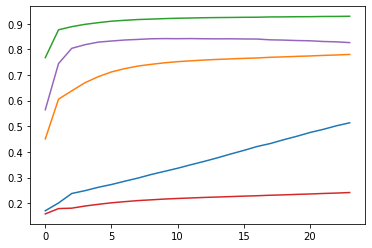

step: 1/2, D_loss: 0.13186233, G_loss_U: 3.6090996, G_loss_S: 0.06392772, E_loss_t0: 0.91045207


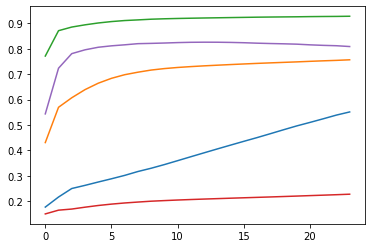

step: 1/2, D_loss: 0.12862186, G_loss_U: 3.6090946, G_loss_S: 0.062802985, E_loss_t0: 0.89221996


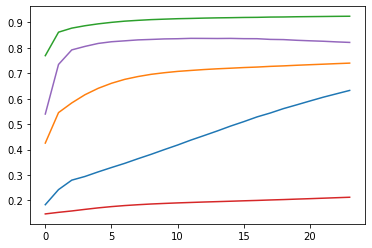

step: 1/2, D_loss: 0.13121425, G_loss_U: 3.6090899, G_loss_S: 0.06435408, E_loss_t0: 0.92485887


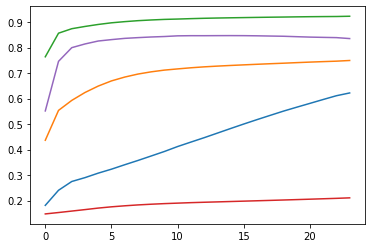

step: 1/2, D_loss: 0.13600247, G_loss_U: 3.6090848, G_loss_S: 0.06430323, E_loss_t0: 0.92221785


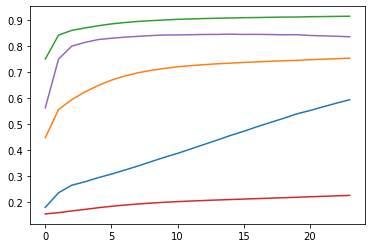

step: 1/2, D_loss: 0.12830561, G_loss_U: 3.6090786, G_loss_S: 0.06353786, E_loss_t0: 0.8850818


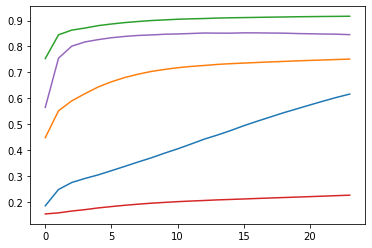

step: 1/2, D_loss: 0.12572365, G_loss_U: 3.6090734, G_loss_S: 0.062492043, E_loss_t0: 0.88650686


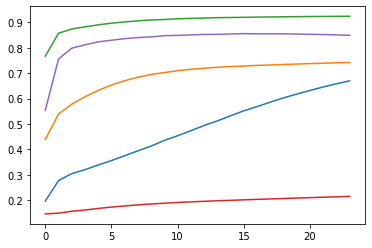

step: 1/2, D_loss: 0.13959438, G_loss_U: 3.609067, G_loss_S: 0.061598934, E_loss_t0: 0.87841064


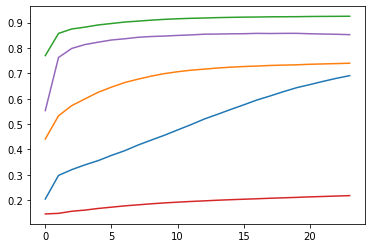

step: 1/2, D_loss: 0.14275351, G_loss_U: 3.6090605, G_loss_S: 0.061628558, E_loss_t0: 0.89921784


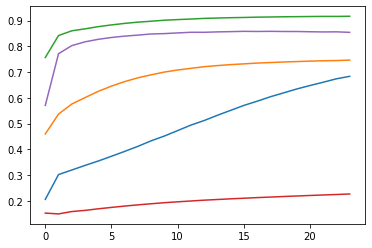

step: 1/2, D_loss: 0.1478794, G_loss_U: 3.6090539, G_loss_S: 0.060368396, E_loss_t0: 0.8799197


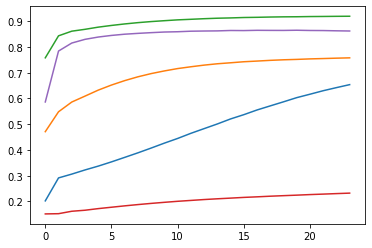

step: 1/2, D_loss: 0.14195715, G_loss_U: 3.6090477, G_loss_S: 0.06070976, E_loss_t0: 0.896211


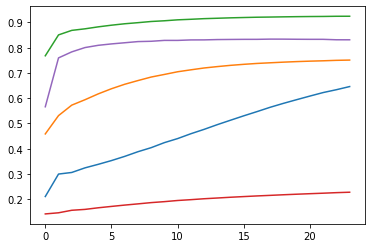

step: 1/2, D_loss: 0.13620089, G_loss_U: 3.6090405, G_loss_S: 0.060285885, E_loss_t0: 0.8631319


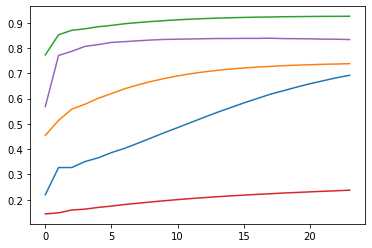

step: 1/2, D_loss: 0.14018779, G_loss_U: 3.6090329, G_loss_S: 0.059381176, E_loss_t0: 0.8656103


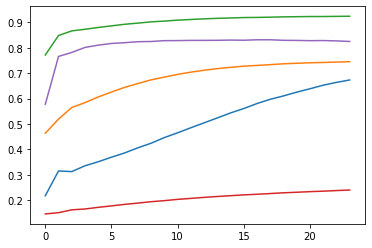

step: 1/2, D_loss: 0.14371818, G_loss_U: 3.6090248, G_loss_S: 0.060314003, E_loss_t0: 0.88421535


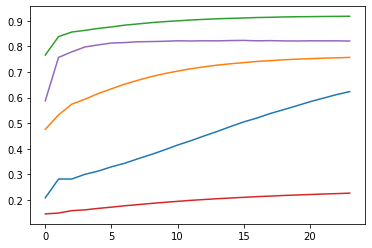

step: 1/2, D_loss: 0.14042287, G_loss_U: 3.6090162, G_loss_S: 0.058262426, E_loss_t0: 0.8575048


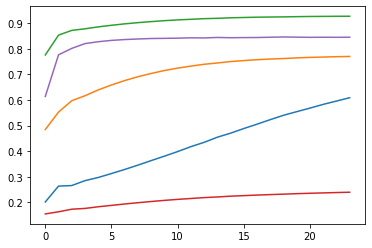

step: 1/2, D_loss: 0.14310423, G_loss_U: 3.6090066, G_loss_S: 0.058420226, E_loss_t0: 0.8883697


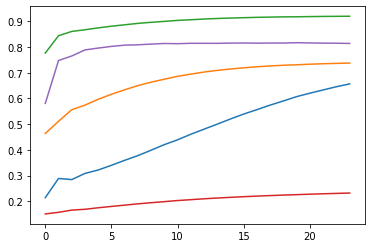

step: 1/2, D_loss: 0.14604199, G_loss_U: 3.6089957, G_loss_S: 0.058928248, E_loss_t0: 0.86694086


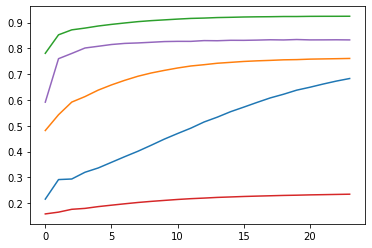

step: 1/2, D_loss: 0.15537857, G_loss_U: 3.6798525, G_loss_S: 0.055778217, E_loss_t0: 0.8649936


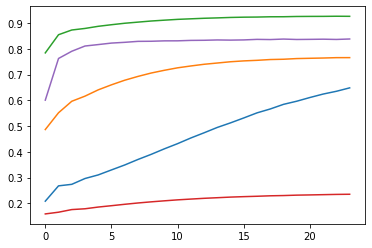

step: 1/2, D_loss: 0.13813116, G_loss_U: 3.6798398, G_loss_S: 0.05667188, E_loss_t0: 0.8868329


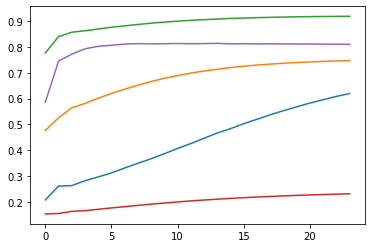

step: 1/2, D_loss: 0.14167094, G_loss_U: 3.6798258, G_loss_S: 0.05666758, E_loss_t0: 0.8943629


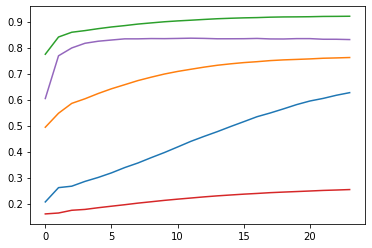

step: 1/2, D_loss: 0.1392249, G_loss_U: 3.6798105, G_loss_S: 0.055117324, E_loss_t0: 0.85195154


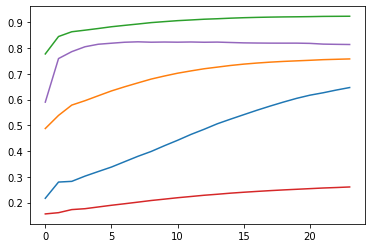

step: 1/2, D_loss: 0.14417376, G_loss_U: 3.6797934, G_loss_S: 0.057092756, E_loss_t0: 0.87880254


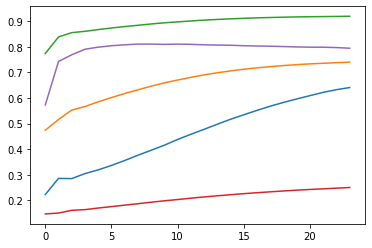

step: 1/2, D_loss: 0.13230865, G_loss_U: 3.6797733, G_loss_S: 0.056318883, E_loss_t0: 0.85303205


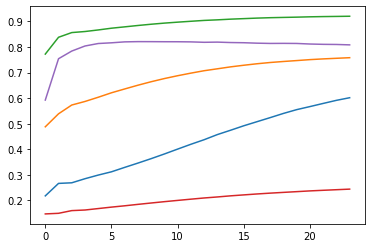

step: 1/2, D_loss: 0.13561766, G_loss_U: 3.6797497, G_loss_S: 0.054348473, E_loss_t0: 0.85110617


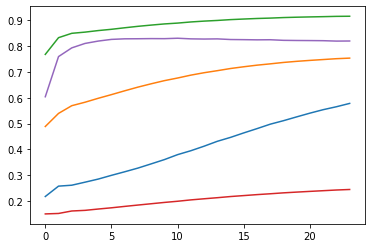

step: 1/2, D_loss: 0.14394651, G_loss_U: 3.679722, G_loss_S: 0.05512278, E_loss_t0: 0.8674417


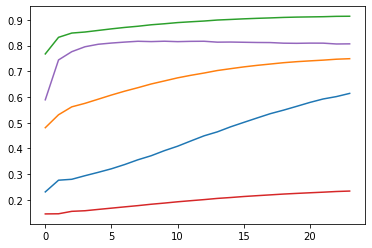

step: 1/2, D_loss: 0.13220154, G_loss_U: 3.6796896, G_loss_S: 0.05538691, E_loss_t0: 0.85906893


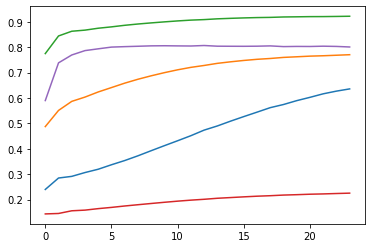

step: 1/2, D_loss: 0.14075303, G_loss_U: 3.6796515, G_loss_S: 0.054634564, E_loss_t0: 0.85866237


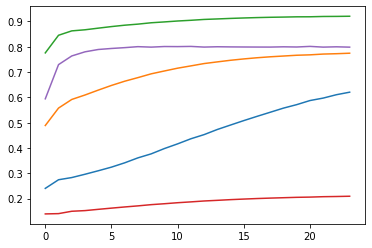

step: 1/2, D_loss: 0.13852787, G_loss_U: 3.6796045, G_loss_S: 0.053542756, E_loss_t0: 0.8422005


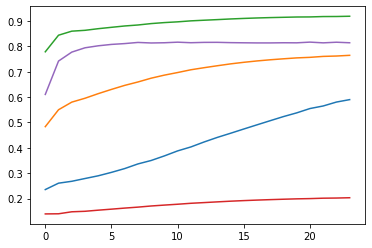

step: 1/2, D_loss: 0.14138897, G_loss_U: 3.6795437, G_loss_S: 0.052628174, E_loss_t0: 0.8600822


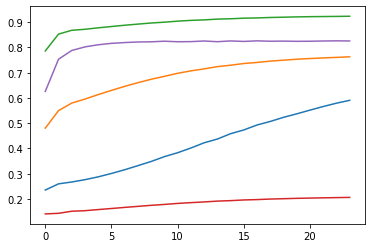

step: 1/2, D_loss: 0.13853006, G_loss_U: 3.6794682, G_loss_S: 0.053822614, E_loss_t0: 0.854359


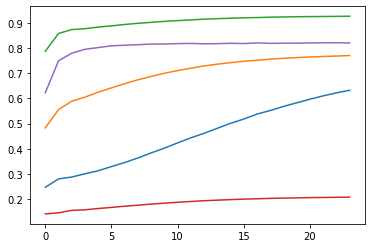

step: 1/2, D_loss: 0.15521488, G_loss_U: 3.7303534, G_loss_S: 0.053165242, E_loss_t0: 0.8482605


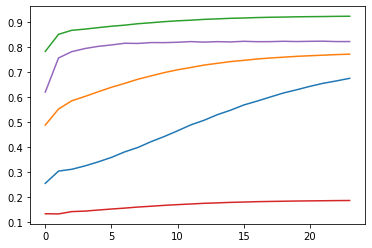

step: 1/2, D_loss: 0.123917684, G_loss_U: 3.730231, G_loss_S: 0.052685484, E_loss_t0: 0.8588078


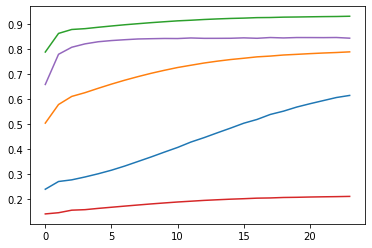

step: 1/2, D_loss: 0.13822229, G_loss_U: 3.7300568, G_loss_S: 0.052158084, E_loss_t0: 0.85649234


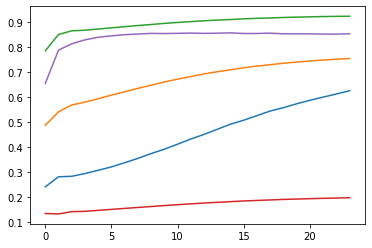

step: 1/2, D_loss: 0.1274129, G_loss_U: 3.72982, G_loss_S: 0.052595485, E_loss_t0: 0.83237654


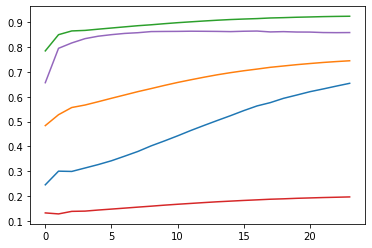

step: 1/2, D_loss: 0.12985502, G_loss_U: 3.729498, G_loss_S: 0.052092463, E_loss_t0: 0.83259636


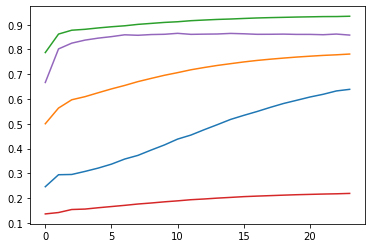

step: 1/2, D_loss: 0.12964241, G_loss_U: 3.7290068, G_loss_S: 0.05115383, E_loss_t0: 0.85396385


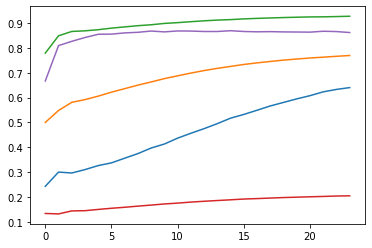

step: 1/2, D_loss: 0.1266826, G_loss_U: 3.728256, G_loss_S: 0.05089482, E_loss_t0: 0.831902


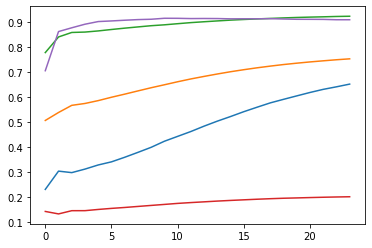

step: 1/2, D_loss: 0.13226788, G_loss_U: 3.7271445, G_loss_S: 0.05188192, E_loss_t0: 0.8523349


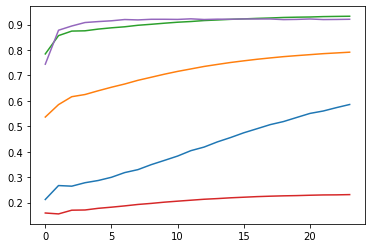

step: 1/2, D_loss: 0.13171788, G_loss_U: 3.725665, G_loss_S: 0.05177785, E_loss_t0: 0.832689


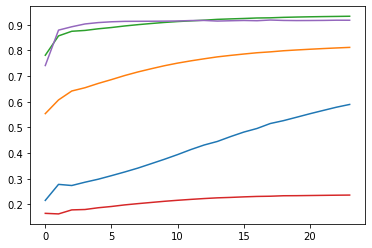

step: 1/2, D_loss: 0.12828033, G_loss_U: 3.7240908, G_loss_S: 0.05113315, E_loss_t0: 0.8410749


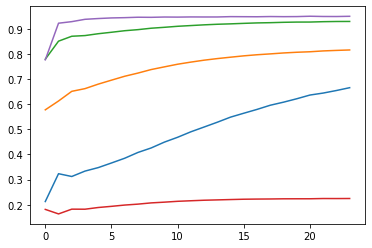

step: 1/2, D_loss: 0.15033963, G_loss_U: 3.7567647, G_loss_S: 0.050274085, E_loss_t0: 0.8619405


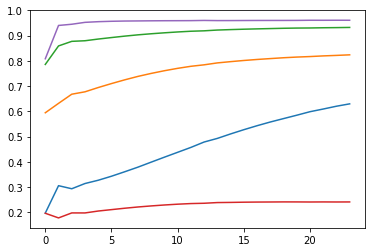

step: 1/2, D_loss: 0.11758189, G_loss_U: 3.755675, G_loss_S: 0.049473207, E_loss_t0: 0.8448447


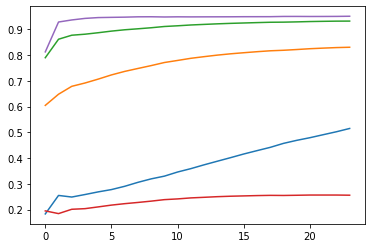

step: 1/2, D_loss: 0.11408908, G_loss_U: 3.7550094, G_loss_S: 0.049874995, E_loss_t0: 0.8325247


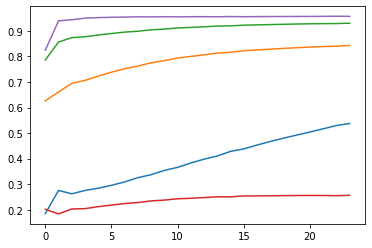

step: 1/2, D_loss: 0.11139905, G_loss_U: 3.75465, G_loss_S: 0.04956072, E_loss_t0: 0.81809086


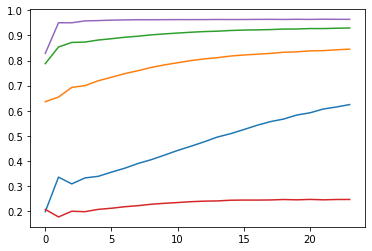

step: 1/2, D_loss: 0.116556354, G_loss_U: 3.7544575, G_loss_S: 0.0487138, E_loss_t0: 0.8487042


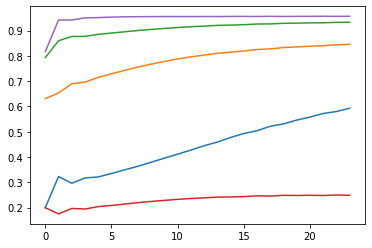

step: 1/2, D_loss: 0.11484313, G_loss_U: 3.7543504, G_loss_S: 0.049398895, E_loss_t0: 0.81071216


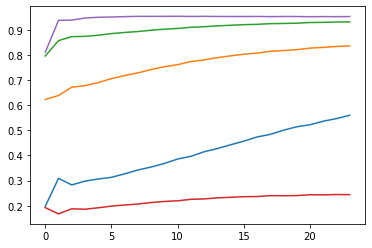

step: 1/2, D_loss: 0.1142176, G_loss_U: 3.7542906, G_loss_S: 0.049771387, E_loss_t0: 0.8162405


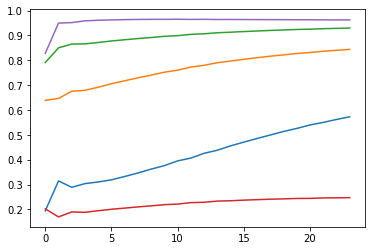

step: 1/2, D_loss: 0.11566531, G_loss_U: 3.7542555, G_loss_S: 0.0494884, E_loss_t0: 0.81681174


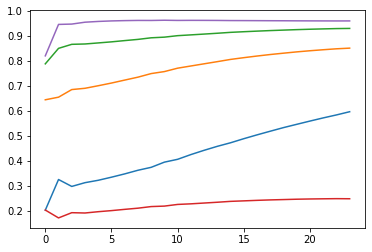

step: 1/2, D_loss: 0.12964457, G_loss_U: 3.7542334, G_loss_S: 0.048475225, E_loss_t0: 0.8233994


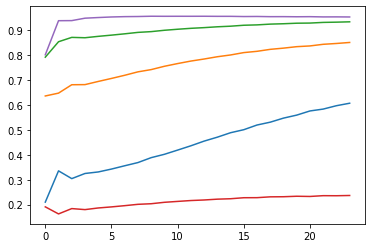

step: 1/2, D_loss: 0.11489855, G_loss_U: 3.7542183, G_loss_S: 0.048494287, E_loss_t0: 0.8250478


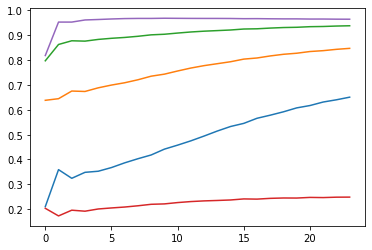

step: 1/2, D_loss: 0.120334975, G_loss_U: 3.7542086, G_loss_S: 0.04793242, E_loss_t0: 0.8229464


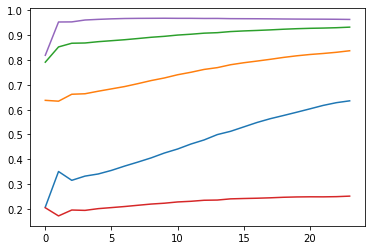

step: 1/2, D_loss: 0.1254264, G_loss_U: 3.7542007, G_loss_S: 0.047682125, E_loss_t0: 0.8222972


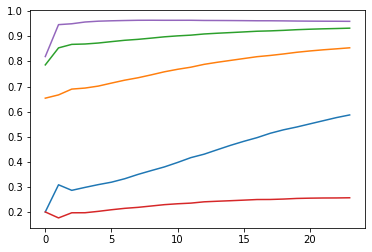

step: 1/2, D_loss: 0.12287754, G_loss_U: 3.7541935, G_loss_S: 0.047775574, E_loss_t0: 0.8231582


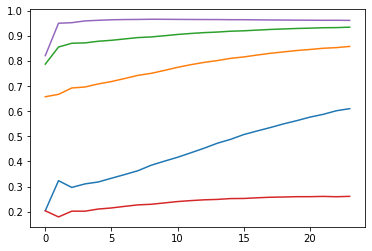

Finish Joint Training


In [9]:
Generator, Embedder, Supervisor, Recovery, Discriminator, checkpoints = TimeGAN(data, parameters)

A Data Set of the same size and dimensions of the original synthetic data Set is generated and visualized and both are compared

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 2000 samples in 0.000s...
[t-SNE] Computed neighbors for 2000 samples in 0.074s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2000
[t-SNE] Computed conditional probabilities for sample 2000 / 2000
[t-SNE] Mean sigma: 0.000495
[t-SNE] KL divergence after 250 iterations with early exaggeration: 64.638962
[t-SNE] KL divergence after 300 iterations: 1.430081


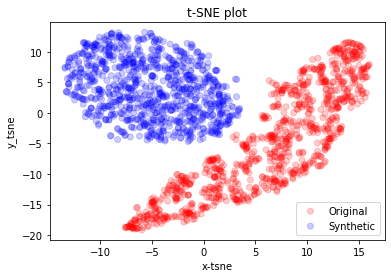

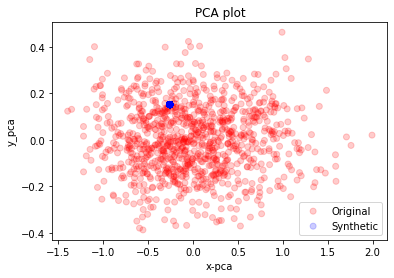

In [10]:
random_test = random_generator(no, dim, extract_time(data)[0], extract_time(data)[1])
test_sample = Generator(torch.tensor(random_generator(no, dim, extract_time(data)[0], extract_time(data)[1])).float())[0]
test_sample = torch.reshape(test_sample, (no, seq_len, parameters['hidden_dim']))
test_recovery = Recovery(test_sample)
test_recovery = torch.reshape(test_recovery[0], (no, seq_len, dim))
visualization(data, test_recovery.detach().numpy(), 'tsne')
visualization(data, test_recovery.detach().numpy(), 'pca')
  